# ANN/ Deep Learning Notebook

Artifificial Neural Network (ANNs) and Deep Learning are foundational technologies in modern Artificial Inteligence(AI). They minic the human brain to process structured and unstructured data for complex problem-solving

# Structured and Unstructured Data

- Structured Data: Data that is organised in a predefined format, typically stored in tables with rows and columns
- Unstructured Data: Data that does not have a predefined structure or format. Examples: text, images, audio, video
- Structured Data easily processed by traditional machine learning algorithms because of its tabular nature
- Unstructured data requires advananced techniques like deep learning to extract meaningful patterns due to its complexity

## Example 
- Structured Data: A CSV file containing customer data
- Unstructured Data: A Collection of images, social media posts, or audio recording

# Use Cases

- Structured Data: Predicting customer churn using a dataset of customer transactions
- Unstructured Data: Classify Images using Convolutional Neural Network (CNNs)

# Neural Networks

A Neural Network is a computational model inspired by the human brain, consisting of layers of interconnected nodes (neurons) that process data

## Neural Networks Architecture
Neural Networks consists of interconnected neurons arranged in layers:
- input Layer: Receives raw data input
- Hidden Layers: Perform Computations and feature extraction
- Output Layer: Produces final predictions or classification


Input ---> Hidden Layer 1 ---> Hidden Layer 2 ---> Output

# Activation Function

Activation functions introduce non-linearity into the neutral network, enabling it to learn complex pattern

#### Types of Activation Function
1. Sigmoid: Used for binary classification
2. ReLU (Rectified Linear Unit): Most commonly used due to efficiency
3. Tanh: Scales outputs between -1 and 1
4. Softmax: Used for multi-class classification

In [ ]:
# Sigmoid Function: Maps input to a range between 0 and 1abs

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
# ReLU (Rectified Linear Unit)
# ReLU is commonly used in hidden layers due to its computational efficiency and ability to mitigate the vanishing gradient problem 

def relu():
    return np.maximum(0, x)

### Multi-Layer Perceptron (MLP)

- An MLP is a class of feedforward neural networks with one or more hidden layers
- In MLP, each neuron in a layer is connected to every neuron in the next layer. 

In [ ]:
## Example

from tensorflow.keras.model import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

## Explanation

##### tensorflow.keras.models.Sequential:
- This imports the Sequential model class from keras. The Sequential model allows you to build a neural network by stacking layers in a linear pattern.
##### tensorflow.keras.layers import.Dense
- This imports the Dense later class. Dense layers are fully connected layers, meaning each neuron in the layer is connected to every neuron in the previous layer.
- model = Sequential ([....]). Defines the layersof the network.
- Dense(64, activation='relu', input_shape=(10,)): This is the first layer of the network
- activation='relu': This applies rectified Linear Unit function to the output of the layer
- input_shape=(10,): This specifies the shape of the input data. In this case each input sample is expected to have 10 features.
- Dense(32): Creates the second layer of the network with 32 neurons
- Dense(1, activation='sigmoid'): This is the output layer of the network, with sigmoid activation function applied.
- Sigmoid outputs a value between 0 and 1, for binary classification 

### Optimizers

- Optimizers are algorithms used to update the weights of a neural network during training


### Common Optimizers
- Gradient Descent: Updates weights in the direction of the negative gradient
- Adam: Combines the benefits of RMSProp and Momentum
- RMSProp: Adapts the learning rate based on the magnitude of gradients

### Steps in completing a Neural Networks Project

- Load the dataset
- Handle missing values
- Encode categorical variables
- Normalize/Scale numerical features
- Split the data into training and testing sets
- Design the neural networks architecture.
- Choose the number of layers and neurons
- Select activation functions(e.g: ReLU for hidden layers, Sigmoid/Softmax for output)
- Compile the model with a loss function, optimizer, and metrics
- Fit the model to the training data
- Monitor training and validation performance
- Evaluate the model
- Tune the model

### Definition of key terms

- Epoch: One complete pass through the training dataset.
- Loss Function: Measure the difference between predicted output and actual outputs
- Overfitting: When a model performs well on training data poorly on test data
- Batch Size: Number of samples processed before updating weights
- 

# ANN Project - Predicting Customer Churn

1. Load important libraries and customer churn dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('customer_churn_data.csv')
df.head(3)

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,Churn
0,1,Male,68,17,27.74,471.58,Month-to-Month,Credit Card,0
1,2,Female,57,52,21.21,1102.92,One Year,Electronic Check,0
2,3,Male,24,12,48.82,585.84,Month-to-Month,Mailed Check,0


In [3]:
df = df.set_index('CustomerID')

In [4]:
df.isna().sum()

Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
PaymentMethod     0
Churn             0
dtype: int64

In [5]:
# Encode categorical Variablesabs

le = LabelEncoder()

categorical_features = ['Gender', 'Contract', 'PaymentMethod']
for features in categorical_features:
    df[features] = le.fit_transform(df[features])

In [6]:
## Split the data

x = df.drop('Churn', axis=1)
y = df['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Normalize numerical features

scaler = StandardScaler()

numeric_features = ['Age', 'MonthlyCharges', 'TotalCharges', ]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [8]:
## bUild the Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


# Define the model layers
model = Sequential()
model.add(Input(shape=(xtrain.shape[1],))) # Define the input shape
model.add(Dense(64, activation='relu')) # Hidden layer 1
model.add(Dense(32, activation='relu')) # Hidden layer 2
model.add(Dense(1, activation='sigmoid')) # Output layer


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 79s 12ms/step - accuracy: 0.6047 - loss: 30.8730 - val_accuracy: 0.7475 - val_loss: 2.0146
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6834 - loss: 2.5754 - val_accuracy: 0.2744 - val_loss: 6.9121
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6540 - loss: 3.5003 - val_accuracy: 0.4087 - val_loss: 2.7531
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6746 - loss: 2.1841 - val_accuracy: 0.7444 - val_loss: 1.5529
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6930 - loss: 1.5536 - val_accuracy: 0.7481 - val_loss: 0.5389
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6970 - loss: 1.1876 - val_accuracy: 0.4900 - val_loss: 1.4657
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6802 - loss: 2.2699 - val_accuracy: 0.5750 - val_loss: 1.0725
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6927 - loss: 1.8258 - val_accuracy:

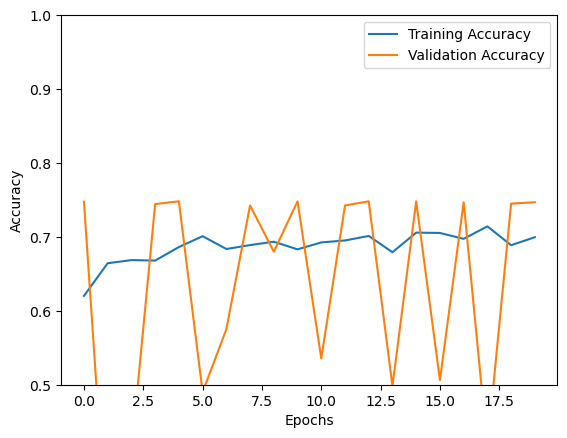

In [9]:
                                                                                                                                                                                                                                                                                            # Train the model

history = model.fit(xtrain, ytrain, epochs=20, batch_size=32,validation_split=0.2)


# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

#Evaluate on test data
y_pred = model.predict(xtest)
y_pred = (y_pred > 0.5)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f'Test Accuracy:{accuracy:.2f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test Accuracy:0.75


In [11]:
# Apply Regularization for overfitting data

from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2


#Add Dropout and regularization
model = Sequential()
model.add(Input(shape=(xtrain.shape[1],))) # Define the input shape
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01))) # Hidden layer 1
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu')) # Hidden layer 2
model.add(Dense(1, activation='sigmoid')) # Output layer


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6143 - loss: 106.0090 - val_accuracy: 0.2587 - val_loss: 3.7984
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6210 - loss: 29.7354 - val_accuracy: 0.7444 - val_loss: 3.5360
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6317 - loss: 17.2832 - val_accuracy: 0.5131 - val_loss: 1.3127
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6327 - loss: 9.2549 - val_accuracy: 0.7406 - val_loss: 2.0440
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6161 - loss: 6.1884 - val_accuracy: 0.7094 - val_loss: 0.6384
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6525 - loss: 3.7441 - val_accuracy: 0.7475 - val_loss: 1.4406
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6218 - loss: 2.8117 - val_accuracy: 0.7475 - val_loss: 1.2862
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6559 - loss: 2.1937 - val_accurac

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7362 - loss: 0.6398 - val_accuracy: 0.7475 - val_loss: 0.6557
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7385 - loss: 0.6234 - val_accuracy: 0.7475 - val_loss: 0.5807
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7383 - loss: 0.6238 - val_accuracy: 0.7475 - val_loss: 0.5765
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7529 - loss: 0.5911 - val_accuracy: 0.7475 - val_loss: 0.5922
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7649 - loss: 0.5735 - val_accuracy: 0.7475 - val_loss: 0.5780
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7586 - loss: 0.5689 - val_accuracy: 0.7475 - val_loss: 0.5847
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7664 - loss: 0.5624 - val_accuracy: 0.7475 - val_loss: 0.5718
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7549 - loss: 0.5672 - val_accuracy: 0.

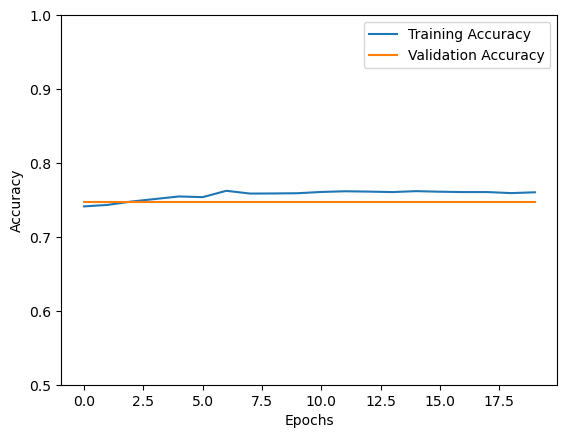

In [12]:
# Train the model

history = model.fit(xtrain, ytrain, epochs=20, batch_size=32,validation_split=0.2)


# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend()
plt.show()

In [13]:
#Evaluate on test data
y_pred = model.predict(xtest)
y_pred = (y_pred > 0.5)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f'Test Accuracy:{accuracy:.2f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Accuracy:0.75


# Save the model for future use

In [18]:
model.save('customer_churn_model.h5')



# Load the model
from keras.models import load_model
loaded_model = load_model('customer_churn_model.h5')

In [23]:
scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [25]:
# Test the model

new_data = [[1,25,1,30,50,0,1]]
new_data = scaler.transform(new_data)
prediction = loaded_model.predict(new_data)
print("Churn Prediction: ", 'Yes' if prediction > 0.5 else 'No')

C:\Users\St Mary\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 58s 58s/step
Churn Prediction:  No
